In [3]:
import numpy as np
import matplotlib.pyplot as plt
from Map import Map
from Curve import Curve

[0.79285875 0.78539222]
[0.83113162 0.82958491]
[0.8325636 0.8319889]
[0.83003828 0.8274686 ]


## Initialization

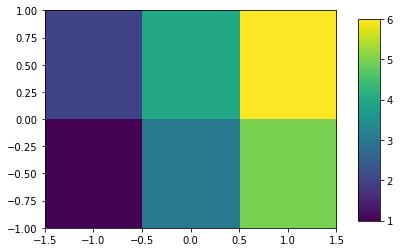

In [4]:
# default initialization
m = Map() # empty map centered at 0,0 size 0,0

# just defining the data
d = np.array([   # d[x][y] -> define data columnwise from lower left corner upwards and towards the right
    [1,2], # x=0
    [3,4], # x=1
    [5,6]  # x=2
])

m1 = Map(d) # default spacing of data points: 1
m1.plot_standalone()

Note: by default the map is centered at (0,0) and the spacing of the data points is 1 in both directions

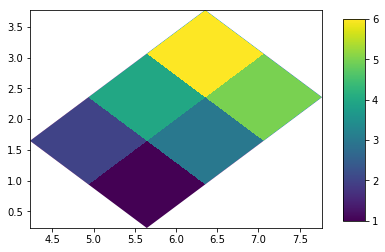

In [5]:
# specify some other size, position, rotation
m2 = Map(d,center_position=(6,2),size=(2,1),angle=45)
m2.plot_standalone()

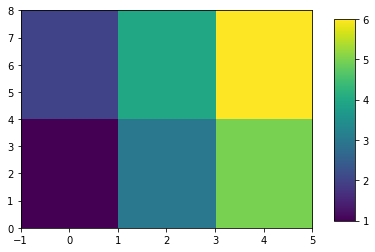

In [6]:
# 2nd way of defining the position: tell from where to where the data ranges
m21 = Map(d,data_range=((0,4),(2,6)))
m21.plot_standalone()

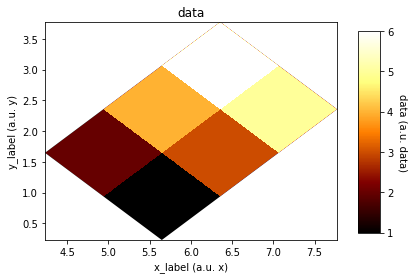

In [7]:
# define other properties
m3 = Map(d,center_position=(6,2),size=(2,1),angle=45,
        x_label="x_label",x_unit="a.u. x",
        y_label="y_label",y_unit="a.u. y",
        data_label="data",data_unit="a.u. data",
        colormap='afmhot')
m3.plot_standalone()

Note: all properties are optional. You can leave out any of them without affecting the rest

### Initialize from a list of curves
Often, one is interested in comparing several curves by plotting them as a 2D map where each line represents the data of one curve. To facilitate this job, a Map can be initialized from a list of curves.

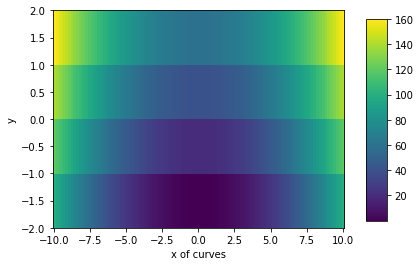

In [8]:
from Curve import Curve
### Simple example: equally spaced curves
x = np.linspace(-10,10,100)
c = Curve(x,x**2)
list_of_curves = [c,c+20,c+40,c+60]

m = Map(x_label='x of curves',y_label='y').from_curves(list_of_curves,y_spacing=1)
m.plot_standalone()

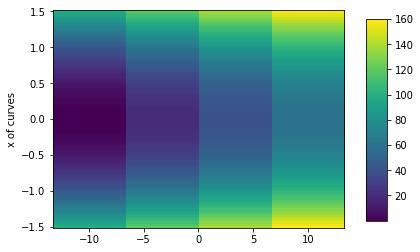

In [9]:
# of course you can stack the curves also along the other direction, using the transpose argument
m2 = Map(y_label='x of curves').from_curves(list_of_curves,y_spacing=1,transpose=True)
m2.plot_standalone()

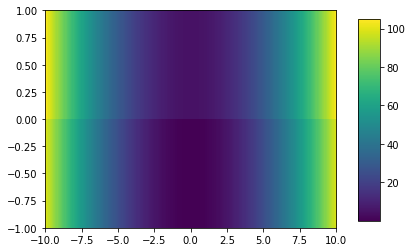

In [10]:
### a more sophisticated example: the curves are not defined on the same values; the from_curves function then interpolates them to fit on the same grid
x1 = np.linspace(-15,15,256)
c1 = Curve(x1,x1**2)
x2 = np.linspace(-10,10,256)
c2 = Curve(x2,x2**2)+5 # +5 just to see the difference between the two lines in the plot. try without it as well.
list_of_curves = [c1,c2]

m = Map().from_curves(list_of_curves,
                        y_spacing=1,
                        x_range=(-10,10), # lets only take the the range where both are defined
                        x_values=c2.get_x() # lets use the x values of the 2nd curve as a basis for the map; anything else could also be used
                        )
m.plot_standalone()

## Getter functions
If you want to perform some custom calculations on the data of the map, the following getter functions might be useful.

pt coordinates
(array([5.64644661, 6.35355339, 7.06066017, 4.93933983, 5.64644661,
       6.35355339]), array([0.93933983, 1.64644661, 2.35355339, 1.64644661, 2.35355339,
       3.06066017]))
corner points data
[array([6.35355339, 3.06066017]), array([4.93933983, 1.64644661]), array([5.64644661, 0.93933983]), array([7.06066017, 2.35355339])]
corner points plot
[array([6.35355339, 3.76776695]), array([4.23223305, 1.64644661]), array([5.64644661, 0.23223305]), array([7.76776695, 2.35355339])]
x1 spacing
1.0
x2 spacing
1.0
grid vectors
(array([0.70710678, 0.70710678]), array([-0.70710678,  0.70710678]))


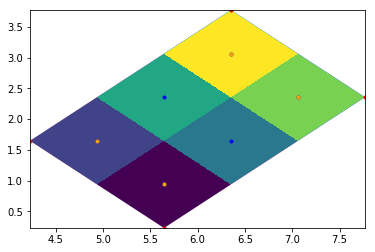

In [11]:
# lets use the map from the beginning
d = np.array([ 
    [1,2], # x=0
    [3,4], # x=1
    [5,6]  # x=2
])
m = Map(d,center_position=(6,2),size=(2,1),angle=45)
# and prepare a plot
fig, ax = plt.subplots()
m.setup_plot(ax)
m.plot(ax)

# get_pt_coordinates
print('pt coordinates')
print(m.get_pt_coordinates())
ax.plot(*m.get_pt_coordinates(),ls='',marker='.',color='blue')

# get_corners_data
print("corner points data")
print(m.get_corners_data())
ax.plot(*zip(*m.get_corners_data()),ls='',marker='.',color='orange')

# get_corners_plot
print("corner points plot")
print(m.get_corners_plot())
ax.plot(*zip(*m.get_corners_plot()),ls='',marker='.',color='red')

# get_x1_spacing
print('x1 spacing')
print(m.get_x1_spacing())

# get_x2_spacing
print('x2 spacing')
print(m.get_x2_spacing())

# get_grid_vectors
print('grid vectors')
print(m.get_grid_vectors())

plt.show()

In [12]:
# get a 3D array with x and y position and the value z of the map
print("get_xyz")
print(m.get_xyz())

get_xyz
[[5.64644661 6.35355339 7.06066017 4.93933983 5.64644661 6.35355339]
 [0.93933983 1.64644661 2.35355339 1.64644661 2.35355339 3.06066017]
 [1.         3.         5.         2.         4.         6.        ]]


### Evaluate the map
to get an interpolation at a given point

In [13]:
# define the data
d = np.array([ 
    [1,2], # x=0
    [3,4], # x=1
    [5,6]  # x=2
])
m = Map(d,center_position=(0,0),size=(2,1))

# get value at one point
print(f'evaluate at (-1,0.5): {m.evaluate(-1,0.5)}')

# get values from several points at once
print(f'evaluate at [(-1,0.5),(0,-0.5)]:\n {m.evaluate([-1,0],[0.5,-0.5])}')

evaluate at (-1,0.5): 2.0
evaluate at [(-1,0.5),(0,-0.5)]:
 [2. 3.]


In [14]:
### Let's look at the interpolation:

# default: linear
print(f'evaluate at (6,1.5): {m.evaluate(6,1.5)}') # actual data point
print(f'evaluate at (6,2): {m.evaluate(6,2)}') # interpolated
print(f'evaluate at (6,2.5): {m.evaluate(6,2.5)}') # actual data point

evaluate at (6,1.5): 0.0
evaluate at (6,2): 0.0
evaluate at (6,2.5): 0.0


In [15]:
# other options: nearest, cubic
print(f'evaluate at (-1,0.5): {m.evaluate(-1,0.5,method="nearest")}') # actual data point
print(f'evaluate at (-0.6,0.5): {m.evaluate(-0.6,0.5,method="nearest")}') # interpolated
print(f'evaluate at (-0.5,0.5): {m.evaluate(-0.5,0.5,method="nearest")}') # interpolated
print(f'evaluate at (-0.3,0.5): {m.evaluate(-0.3,0.5,method="nearest")}') # interpolated
print(f'evaluate at (0,0.5): {m.evaluate(0,0.5,method="nearest")}') # actual data point

evaluate at (-1,0.5): 2.0
evaluate at (-0.6,0.5): 2.0
evaluate at (-0.5,0.5): 2.0
evaluate at (-0.3,0.5): 4.0
evaluate at (0,0.5): 4.0


## Data manipulation

### Simple operations
You can add, subtract, multiply and divide maps. This will execute this operation pointwise on the data point of the first map object. 
The interpolation method and fill values around

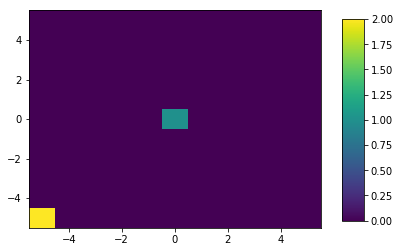

In [46]:
d1 = np.zeros((11,11))
d1[5][5] = 1
m1 = Map(d1)
d2 = np.zeros((11,11))
d2[0][0] = 2
m2 = Map(d2)

m3 = m1+m2
m3.plot_standalone()

### Cropping maps
If you only want to continue working with a part of the map, you can crop it to the desired size (and angle!)

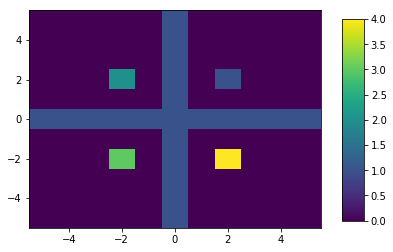

In [16]:
# Create some test data
d = np.zeros((11,11))
d[5][:] = 1
d.T[5][:] = 1
d[7][7] = 1
d[3][7] = 2
d[3][3] = 3
d[7][3] = 4
m = Map(d)
m.plot_standalone()

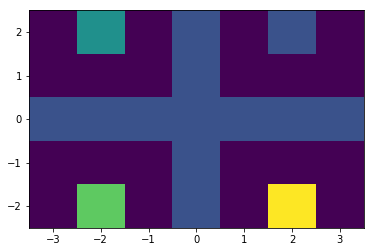

In [17]:
# crop it
m2 = m.cropped(size=(6,4))
#m2.plot_standalone()
fig,ax = plt.subplots()
m2.plot(ax)
plt.show()

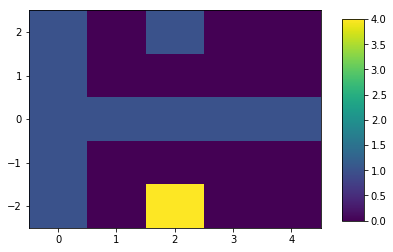

In [18]:
m3 = m.cropped(size=(5,5),center_position=(2,0))
m3.plot_standalone()

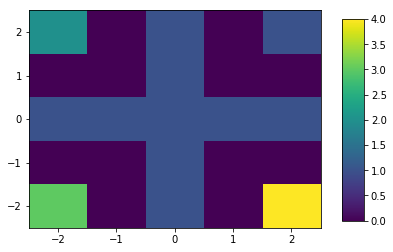

In [19]:
m4 = m.cropped(size=(5,5),angle=45) # if interpolate is False (by default): angle is ignored
m4.plot_standalone()

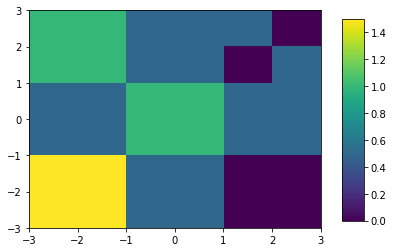

In [20]:
# using interpolation
m5 = m.cropped(size=(5,5),interpolate=True) 
m5.plot_standalone()

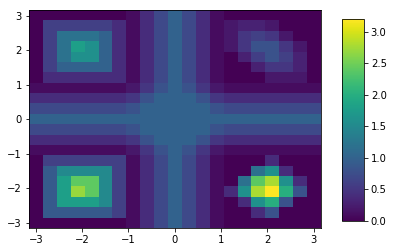

In [21]:
m6 = m.cropped(size=(6,6),x_pts=21,y_pts=21,interpolate=True) 
m6.plot_standalone()

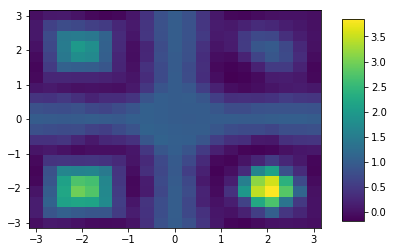

In [22]:
m7 = m.cropped(size=(6,6),x_pts=21,y_pts=21,interpolate=True,method='cubic') 
m7.plot_standalone()

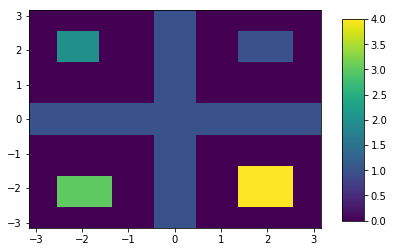

In [23]:
m7 = m.cropped(size=(6,6),x_pts=21,y_pts=21,interpolate=True,method='nearest') 
m7.plot_standalone()

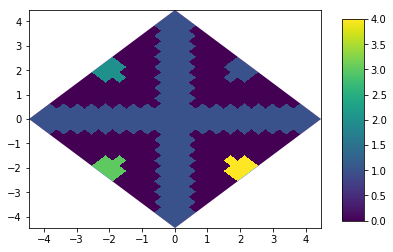

In [24]:
m8 = m.cropped(size=(6,6),x_pts=21,y_pts=21,interpolate=True,method='nearest',angle=45) 
m8.plot_standalone()

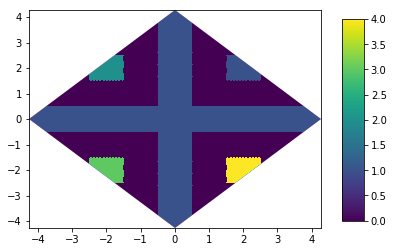

In [25]:
m9 = m.cropped(size=(6,6),x_pts=200,y_pts=200,interpolate=True,method='nearest',angle=45) 
m9.plot_standalone()

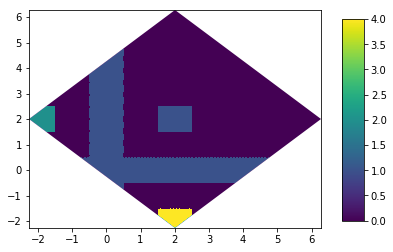

In [26]:
m10 = m.cropped(center_position=(2,2),size=(6,6),x_pts=200,y_pts=200,interpolate=True,method='nearest',angle=45) 
m10.plot_standalone()

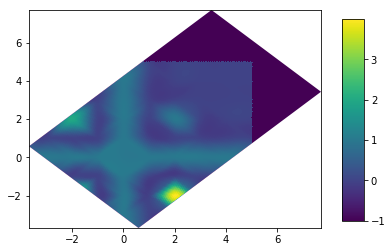

In [27]:
m11 = m.cropped(center_position=(2,2),size=(10,6),x_pts=200,y_pts=200,interpolate=True,method='cubic',angle=45,fill_value=-1) 
m11.plot_standalone()

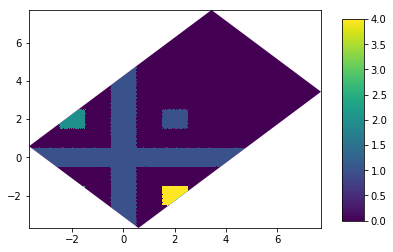

In [28]:
m12 = m.cropped(center_position=(2,2),size=(10,6),x_pts=200,y_pts=200,interpolate=True,method='nearest',angle=45,fill_value=-1) 
m12.plot_standalone()

### Extract a profile

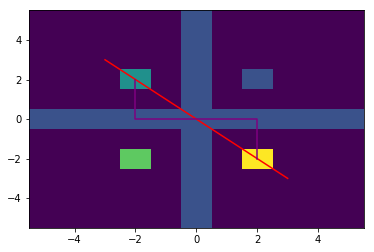

In [29]:
p1 = m.straight_profile((-3,3),(3,-3),50,interpolation_args={'method':'cubic'})
fig,ax = plt.subplots()
m.plot(ax)
p1.plot_trajectory(ax,plot_args={'color':'red'})

p2 = m.profile([(-2,2),(-2,1),(-2,0),(2,0),(2,-1),(2,-2)])
p2.plot_trajectory(ax,plot_args={'color':'purple'})
plt.show()

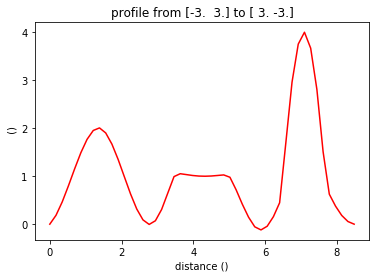

In [30]:
p1.plot_standalone(plot_args={'color':'red'})

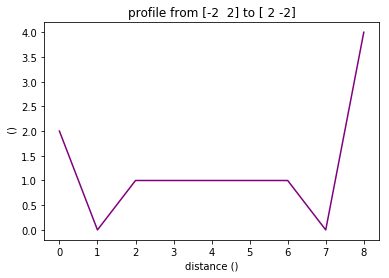

In [31]:
p2.plot_standalone(plot_args={'color':'purple'})

## Leveling data

### Zero data

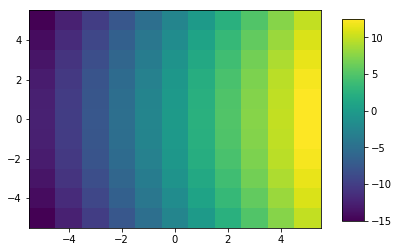

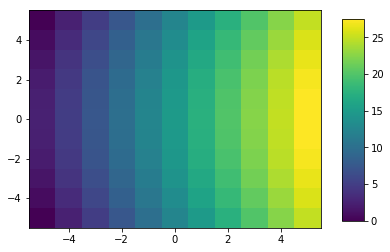

In [32]:
m = Map(np.ones((11,11)))
m.apply_transformation(lambda x,y,z: 2.5*x-0.1*y**2)
m.plot_standalone()

m -= m.min()
m.plot_standalone()

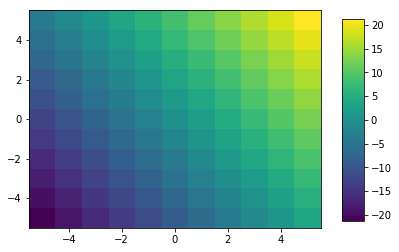

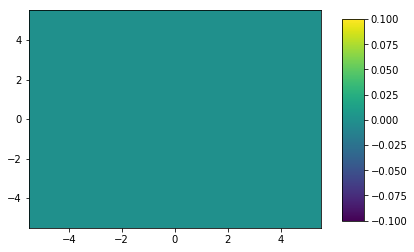

In [33]:
### Three point level
m = Map(np.ones((11,11)))
m.apply_transformation(lambda x,y,z: 2.5*x+1.75*y)
m.plot_standalone()

m.three_point_level([(0,0),(3,0),(0,3)])
m.plot_standalone()


## FFT and IFFT


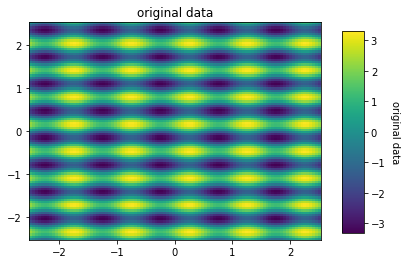

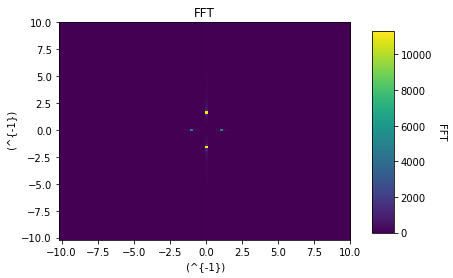

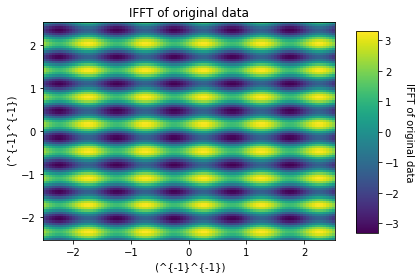

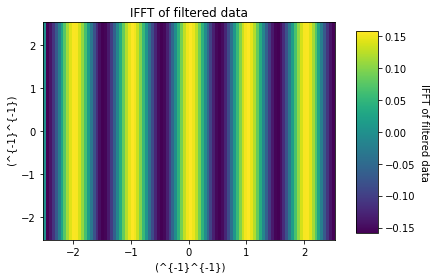

In [34]:
m = Map(np.ones((100,100)),size=(5,5))
m.data_label = "original data"
m.apply_transformation(lambda x,y,z: np.sin(x*2*np.pi)+2.3*np.sin(1.6*y*2*np.pi))
m.plot_standalone(block=False)

mfft = m.FFT()
mfft.data_label = "FFT"
mfft.plot_standalone(block=False)

filtered_fft = mfft.select_rect(x_range=(None,None),y_range=(-0.1,0.1))

mifft_fft = mfft.IFFT()
mifft_fft.data_label = "IFFT of original data"
mifft_fft.plot_standalone()

ifft_filtered = filtered_fft.IFFT()
ifft_filtered.data_label = "IFFT of filtered data"
ifft_filtered.plot_standalone()


# General data transformation


## apply_transformation_linewise

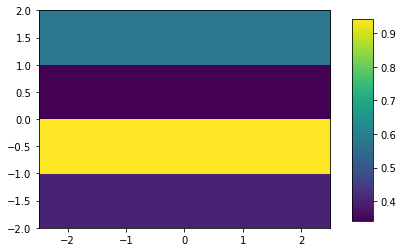

In [35]:
# simple example
m = Map(np.zeros((5,4)))
def random_line_offset(c,y,y_index):
    return c+np.random.rand()
m.apply_transformation_linewise(random_line_offset)
m.plot_standalone()

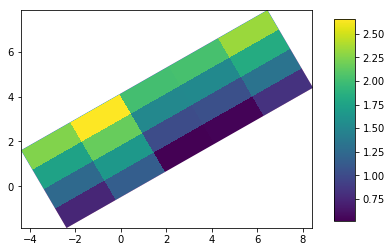

In [36]:
# testing all parameter
m = Map(np.zeros((5,4)),center_position=(2,3),size=(10,3),angle=30)
slope = Curve([0,10],[0,5])
def random_line_offset(c,y,y_index):
    return c+np.random.rand()+slope
m.apply_transformation_linewise(random_line_offset,direction='v')
m.plot_standalone()

## application examples
### subtract_polynomial_linewise


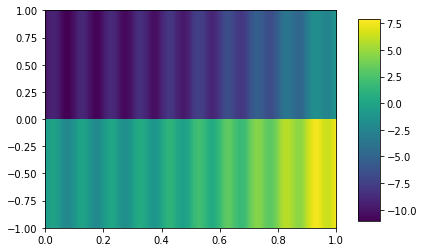

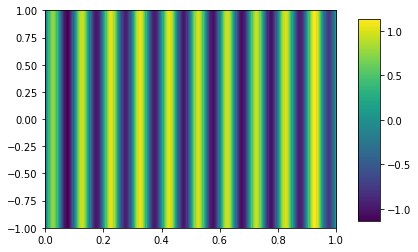

In [37]:
x = np.linspace(0,1,256)
l1 = Curve(x,np.sin(2*np.pi*x*10) + 10*(x-0.3)**2 + 5*x -2)
l2 = Curve(x,np.sin(2*np.pi*x*10) + 10*(x-0.25)**3 + 5*x**2 -10)
m = Map().from_curves([l1,l2])
m.plot_standalone(block=False)

m.subtract_polynomial_linewise(3)
m.plot_standalone()

# Fitting


## 2D Fit

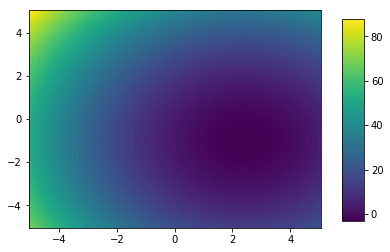

[ 2.4 -1.  -3. ]


In [38]:
# generate data
m = Map(np.zeros((100,100)),size=(10,10))
m.apply_transformation(lambda x,y,z: (x-2.4)**2+(y+1)**2-3)
#m.plot_standalone()

# define the function to be fitted to the data
def func(x,y,x0,y0,c):
    return (x-x0)**2+(y-y0)**2+c

#fit
popt,_ = m.fit(func,(0,0,0))
print(popt)

## 1D fit

1: [0.61230061 0.47629719]
2: [0.98589138 0.01416023]
3: [0.9950239  0.00504302]
4: [0.97886127 0.02334032]


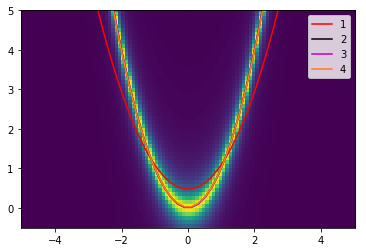

In [41]:
# generate data
m = Map(np.zeros((100,100)),size=(10,10))
m.apply_transformation(lambda x,y,z: 1/((y-x**2)**2+0.1))

# define the 1D function y=f(x) to be fitted
def square(x,a,b):
    return a*x**2+b

# default weight: z value of the map only works for highly symmetric data
popt1,pcov1 = m.fit_1D(square,(1,0)) 
print(f'1: {popt1}')

# custom weight: z**2; higher weight on high z -> leads to improved fit
popt2,pcov2 = m.fit_1D(square,(1,0),weight=lambda x,y,z:z**2)
print(f'2: {popt2}')

# custom weight: z**3; even higher weight on high z -> leads to improved fit
popt3,pcov3 = m.fit_1D(square,(1,0),weight=lambda x,y,z:z**3)
print(f'3: {popt3}')

# custom weight: use thresholding to select only the relevant points: gives a very good result as well
from Map import lower_cutoff_weight
popt4,pcov4 = m.fit_1D(square,(1,0),weight=lambda x,y,z:lower_cutoff_weight(z,1))
print(f'4: {popt4}')

fig, ax = plt.subplots()
m.plot(ax)
x = np.linspace(-5,5)
ax.plot(x,square(x,*popt1),'r-',label='1')
ax.plot(x,square(x,*popt2),'k-',label='2')
ax.plot(x,square(x,*popt3),'m-',label='3')
ax.plot(x,square(x,*popt4),color='tab:orange',label='4')
ax.set_ylim(-0.5,5)
plt.legend()
plt.show()